Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
dataset = pd.read_csv('Admission_Predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
dataset['Chance of Admit '] = [1 if each > 0.80 else 0 for each in dataset['Chance of Admit ']]

x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("Size of splitted data: ")
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data: 
x_train (320, 7)
x_test (80, 7)
y_train (320,)
y_test (80,)


Applying Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Using the Machine Learning Models

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

Predicting values

In [28]:
pred_dtc = dtc.predict(x_test)

Confusion Matrix Display

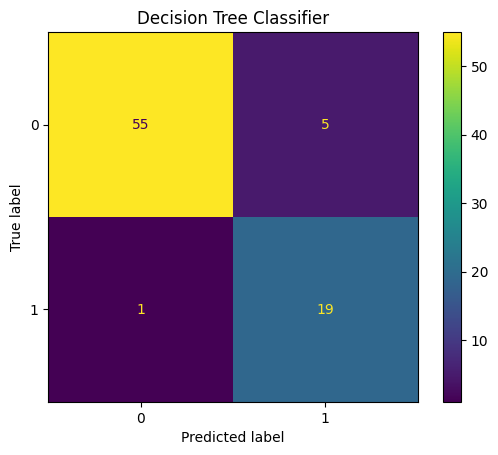

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.79      0.95      0.86        20

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, pred_dtc)
plt.title("Decision Tree Classifier")
plt.show()
print(classification_report(y_test, pred_dtc))

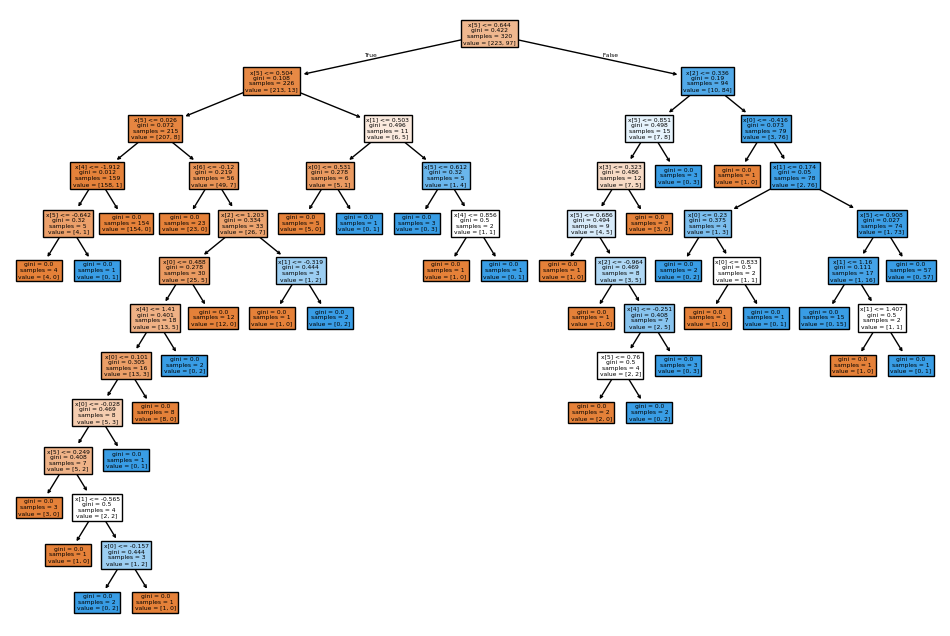

In [32]:
plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True)
plt.show()